In [1]:
#Data.csv

**Step 1: Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Importing dataset**

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


**Step 3: Handling the missing data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [5]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [6]:
k=df['Age'].median()

In [7]:
df['Age'].fillna(value = k, inplace = True)

In [8]:
df['Salary'].mean()

63777.77777777778

In [9]:
df['Salary'].fillna(value = 63780, inplace = True)

In [10]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63780.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [11]:
df['Purchased']=df['Purchased'].map({'Yes':1,'No':0})

In [12]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,63780.0,1


**Step 5: Creating a dummy variable**

In [13]:
dv=pd.get_dummies(df.Country)
dv.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [14]:
merged=pd.concat([df,dv],axis='columns')
merged.head()

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.0,72000.0,0,1,0,0
1,Spain,27.0,48000.0,1,0,0,1
2,Germany,30.0,54000.0,0,0,1,0
3,Spain,38.0,61000.0,0,0,0,1
4,Germany,40.0,63780.0,1,0,1,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [15]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # for plotting the data
import matplotlib.pyplot as plt #for plotting the data

In [16]:
X = merged[['Age', 'Salary','France','Germany']].values # fts
y = merged['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

In [17]:
X_train

array([[3.7e+01, 6.7e+04, 1.0e+00, 0.0e+00],
       [2.7e+01, 4.8e+04, 0.0e+00, 0.0e+00],
       [3.8e+01, 5.2e+04, 0.0e+00, 0.0e+00],
       [4.8e+01, 7.9e+04, 1.0e+00, 0.0e+00],
       [3.8e+01, 6.1e+04, 0.0e+00, 0.0e+00],
       [4.4e+01, 7.2e+04, 1.0e+00, 0.0e+00],
       [3.5e+01, 5.8e+04, 1.0e+00, 0.0e+00]])

**Step 7: Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [19]:
from sklearn.linear_model import LogisticRegression #code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

In [20]:
logistic_regression.predict_proba(X_test)

array([[0.43810566, 0.56189434],
       [0.8208203 , 0.1791797 ],
       [0.66475574, 0.33524426]])

In [21]:
logistic_regression.coef_

array([[-0.63776772,  0.10360984,  0.71294179,  0.        ]])

In [22]:
logistic_regression.intercept_

array([0.3167526])

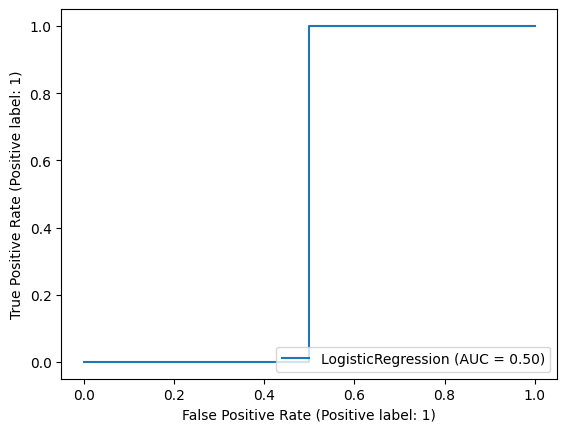

In [31]:
from sklearn.metrics import RocCurveDisplay,confusion_matrix
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

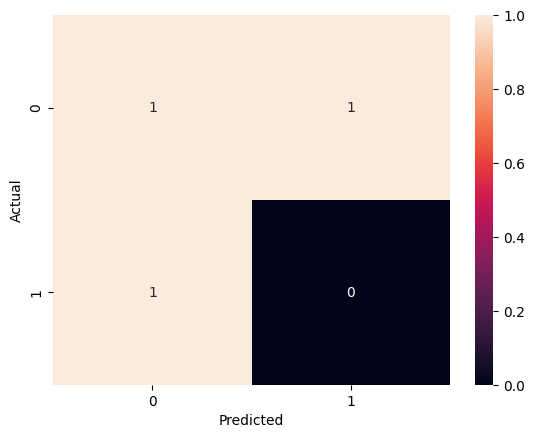

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)